# HW5: Learning Classifier Weights using Perceptron Learning and Gradient Descent

Blanca Miller <br />
STAT 760 <br />
03.08.2018 <br />

__Objective:__ 
- Generate a data set composed of classified points where each data vector is made up of a position and classification.
- part a) Find a separating hyperplane using perceptron learning algorithm using a step function. Measure the run time for 10, 50 & 100 points. 
- part b) Find a separating hyperplane using gradient descent using a sigmoid function. Measure the run time for 10, 50, & 100 points. 
- Does the run time increase linearly? Explain.

Weights map inputs to outputs, thus classifying a set of inputted data. The perceptron learning algorithm (PLA) always finds a hyperplane in a fininte amount of iterations, if a data set is linearly separable. Greadient descent finds the minimun of a function the (non-linear separability) 


with a step function using the thresholded outputs. 

__Given:__
    - input vector: xi
    - target/label: y
    - learning rate: η 
    - weight: wi
    - predicted label: y_hat

__Perceptron Learning Algorithm:__
    - output calculation: y_hat = ∑ wi * xi , where y_hat>=0 or y_hat<0
    - weight calculation: wi = wi + Δwi
    - weight change: Δwi = η(y - y_hat) * xi
    
__Gradient Descent:__
    - Learning Rate: Used to limit the amount each weight is corrected for each update
    - Epochs: The number of times to run through the training data while updating the weight

### Import Libraries

In [1]:
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt

from numpy import dot
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs

#### Randomly Generate & Plot a data set & labels where n=10, 50, & 100

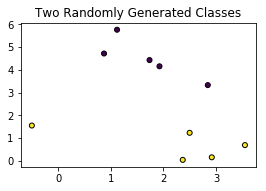

In [2]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(322)
plt.title("Two Randomly Generated Classes")
X_10, y_10 = make_blobs(n_samples=10, centers=2, n_features=2,random_state=0)
plt.scatter(X_10[:,0], X_10[:,1], marker='o', c=y_10, s=25, edgecolor='k')
plt.show()

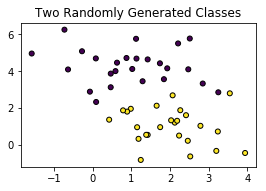

In [3]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(322)
plt.title("Two Randomly Generated Classes")
X_50, y_50 = make_blobs(n_samples=50, centers=2, n_features=2,random_state=0)
plt.scatter(X_50[:,0], X_50[:,1], marker='o', c=y_50, s=25, edgecolor='k')
plt.show()

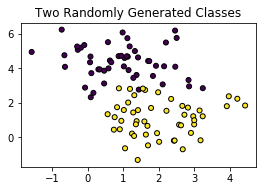

In [4]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(322)
plt.title("Two Randomly Generated Classes")
X_100, y_100 = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)
plt.scatter(X_100[:,0], X_100[:,1], marker='o', c=y_100, s=25, edgecolor='k')
plt.show()

In [5]:
#print(X_10)
#print(y_10)
#print(X_50)
#print(y_50)
#print(X_100)
#print(y_100)

## PART A

### Perceptron Learning Algorithm

In [6]:
# set the step function
step = lambda x: 0 if x < 0 else 1

# choose a number of random weights between 0 & 1
w =  np.random.rand(2)

# initialie an error list, a learning rate, and a variable for the number of samples 
errors = []
eta = 0.2
n_10 = 10
n_50 = 50
n_100 = 100

In [7]:
#try to reduce the error magnitude to zero 
for i in range(n_10):
    
    # choose a random input from the data set
    rand = random.randrange(0, 10, 1)
    x = X_10[rand]
    label = y_10[rand]
    
    # compute the dot product of the weight and input vector
    result = dot(w, x)
    
    # compare the expected label to the predicted label
    error = label - step(result)
    
    # store errors to list to plot afterwards
    errors.append(error)
    w += eta * error * x

    print("x: {} , y: {} , result: {} , error: {} , weight: {}".format(x, label, result, error, w))

x: [1.9263585  4.15243012] , y: 0 , result: 1.84015867119 , error: -1 , weight: [ 0.22475213 -0.67033063]
x: [1.9263585  4.15243012] , y: 0 , result: -2.35054791878 , error: 0 , weight: [ 0.22475213 -0.67033063]
x: [-0.49772229  1.55128226] , y: 1 , result: -1.15173615142 , error: 1 , weight: [ 0.12520767 -0.36007418]
x: [0.87305123 4.71438583] , y: 0 , result: -1.58821588651 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [2.84382807 3.32650945] , y: 0 , result: -0.841721070163 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [1.9263585  4.15243012] , y: 0 , result: -1.25398800077 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [1.7373078  4.42546234] , y: 0 , result: -1.37597045042 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [2.36833522 0.04356792] , y: 1 , result: 0.280846045825 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [2.84382807 3.32650945] , y: 0 , result: -0.841721070163 , error: 0 , weight: [ 0.12520767 -0.36007418]
x: [3.54934659 0.6925054 ] , y: 1 , result

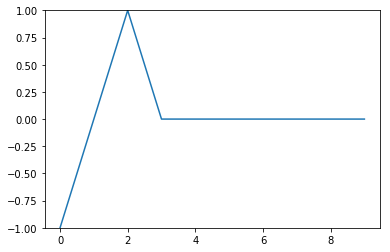

In [8]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)
plt.show()

In [9]:
#try to reduce the error magnitude to zero 
for i in range(n_50):
    
    # choose a random input from the data set
    rand = random.randrange(0, 49, 1)
    x = X_50[rand]
    label = y_50[rand]
    
    # compute the dot product of the weight and input vector
    result = dot(w, x)
    
    # compare the expected label to the predicted label
    error = label - step(result)
    
    # store errors to list to plot afterwards
    errors.append(error)
    w += eta * error * x

    print("x: {} , y: {} , result: {} , error: {} , weight: {}".format(x, label, result, error, w))

x: [0.89011768 1.79849015] , y: 1 , result: -0.53614029965 , error: 1 , weight: [ 0.3032312  -0.00037615]
x: [1.14796916 0.94960906] , y: 1 , result: 0.347742876637 , error: 0 , weight: [ 0.3032312  -0.00037615]
x: [ 3.19466821 -0.33716216] , y: 1 , result: 0.968849907553 , error: 0 , weight: [ 0.3032312  -0.00037615]
x: [1.18447037 0.318814  ] , y: 1 , result: 0.359048455657 , error: 0 , weight: [ 0.3032312  -0.00037615]
x: [0.46546494 3.12315514] , y: 0 , result: 0.139968729156 , error: -1 , weight: [ 0.21013822 -0.62500718]
x: [0.4666179  3.86571303] , y: 0 , result: -2.31804412772 , error: 0 , weight: [ 0.21013822 -0.62500718]
x: [3.54351972 2.79355284] , y: 1 , result: -1.00136165874 , error: 1 , weight: [ 0.91884216 -0.06629661]
x: [3.54351972 2.79355284] , y: 1 , result: 3.07073222517 , error: 0 , weight: [ 0.91884216 -0.06629661]
x: [2.20656076 5.50616718] , y: 0 , result: 1.66244084182 , error: -1 , weight: [ 0.47753001 -1.16753004]
x: [0.4666179  3.86571303] , y: 0 , result: 

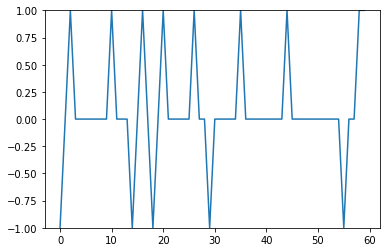

In [10]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)
plt.show()

In [11]:
#try to reduce the error magnitude to zero 
for i in range(n_100):
    
    # choose a random input from the data set
    rand = random.randrange(0, 99, 1)
    x = X_100[rand]
    label = y_100[rand]
    
    # compute the dot product of the weight and input vector
    result = dot(w, x)
    
    # compare the expected label to the predicted label
    error = label - step(result)
    
    # store errors to list to plot afterwards
    errors.append(error)
    w += eta * error * x

    print("x: {} , y: {} , result: {} , error: {} , weight: {}".format(x, label, result, error, w))

x: [1.02102468 1.57925818] , y: 1 , result: 0.359568283899 , error: 0 , weight: [ 1.54038163 -0.76820839]
x: [-0.07228289  2.88376939] , y: 0 , result: -2.32667905971 , error: 0 , weight: [ 1.54038163 -0.76820839]
x: [1.28933778 3.44969159] , y: 0 , result: -0.664009776083 , error: 0 , weight: [ 1.54038163 -0.76820839]
x: [1.25185786 0.20811388] , y: 1 , result: 1.76846401701 , error: 0 , weight: [ 1.54038163 -0.76820839]
x: [3.2460247  2.84942165] , y: 0 , result: 2.81116721277 , error: -1 , weight: [ 0.89117669 -1.33809272]
x: [1.18454506 5.28042636] , y: 0 , result: -6.01006111644 , error: 0 , weight: [ 0.89117669 -1.33809272]
x: [ 1.05505217 -0.64710744] , y: 1 , result: 1.80612765174 , error: 0 , weight: [ 0.89117669 -1.33809272]
x: [ 1.05505217 -0.64710744] , y: 1 , result: 1.80612765174 , error: 0 , weight: [ 0.89117669 -1.33809272]
x: [1.33263648 5.0103605 ] , y: 0 , result: -5.51671232446 , error: 0 , weight: [ 0.89117669 -1.33809272]
x: [2.85942078 2.95602827] , y: 0 , result

### Plot the PLA Errors

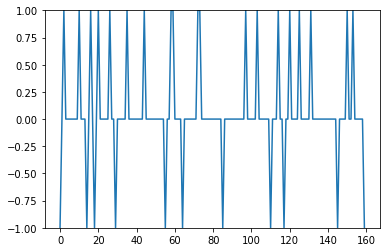

In [12]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)
plt.show()

## PART B

### Gradient Descent 

In [13]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [14]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    epoch = 0
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [15]:
#for t in range(X.shape[0]): 
    #predict(X[i], y[i])

In [16]:
clf_10 = linear_model.SGDClassifier()
clf_50 = linear_model.SGDClassifier()
clf_100 = linear_model.SGDClassifier()

In [21]:
clf_10.fit(X_10, y_10)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [19]:
clf_50.fit(X_50, y_50)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [20]:
clf_100.fit(X_100, y_100)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)